# Proyecto de Día 11 - Análisis Predictivo para una Tienda Minorista

### Objetivo
Tu tarea consiste en desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.


**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.

**5. Conclusión**

- Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.


### Nota
* Enfócate en la claridad y simplicidad de tu código.

¡Mucha Suerte!

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
ruta="/content/Ventas (1).csv"
df=pd.read_csv(ruta)
df

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB
None


In [4]:
# transformar la fecha de objetc a datatime
df['Fecha']=pd.to_datetime(df['Fecha'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [5]:
#ordenamos el df por fechas
df=df.sort_values(by='Fecha')
df

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


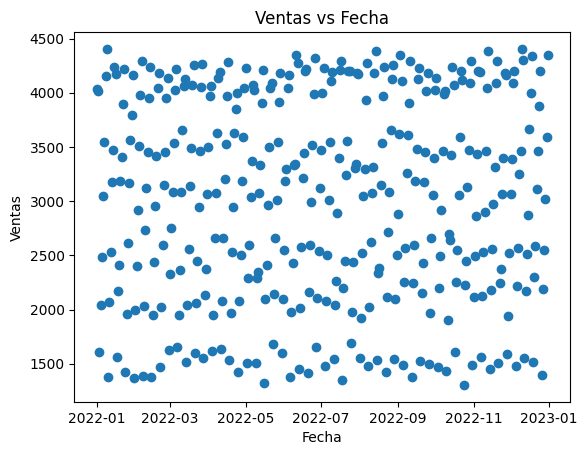

In [9]:
# ahora ponemos las variables dependientes y independientes
plt.scatter(df["Fecha"],df['Ventas'])
plt.title("Ventas vs Fecha")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()

Como se puede ver en el cuadro no hay relacion lineal


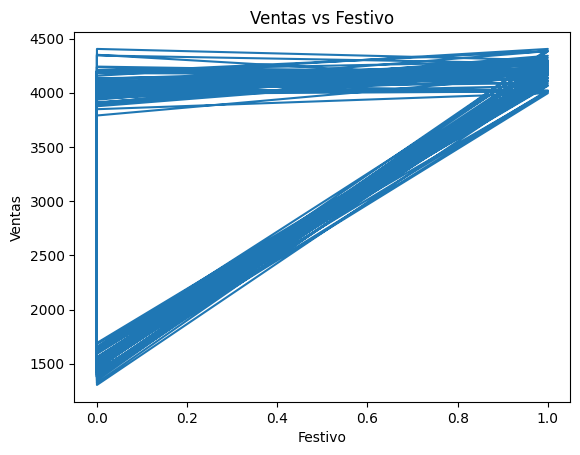

In [10]:
plt.plot(df["Festivo"],df['Ventas'])
plt.title("Ventas vs Festivo")
plt.xlabel("Festivo")
plt.ylabel("Ventas")
plt.show()

In [11]:
df["dias"]=df["Fecha"].dt.day
df["mes"]=df["Fecha"].dt.month
df["fin de semana"]=df["Fecha"].dt.weekday>=5
df

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas,dias,mes,fin de semana
0,2022-01-01,6,0,0,4033,1,1,True
1,2022-01-02,7,0,1,4012,2,1,True
2,2022-01-03,1,0,0,1608,3,1,False
3,2022-01-04,2,1,0,2046,4,1,False
4,2022-01-05,3,0,0,2484,5,1,False
...,...,...,...,...,...,...,...,...
360,2022-12-27,2,1,0,2189,27,12,False
361,2022-12-28,3,0,0,2548,28,12,False
362,2022-12-29,4,0,0,3018,29,12,False
363,2022-12-30,5,0,0,3591,30,12,False


In [16]:
X=df.drop(columns=["Fecha","Ventas"],axis=1)

In [17]:
y=df["Ventas"]

In [28]:
X_entrenamiento,X_prueba,y_entrenamiento,y_prueba=train_test_split(X,y,train_size=0.8,random_state=42)

In [35]:
bosque=RandomForestRegressor(n_estimators=100,random_state=42)
bosque.fit(X_entrenamiento,y_entrenamiento)


RandomForestRegressor(random_state=42)

In [36]:
bosque.score(X_prueba,y_prueba)

0.9884595780341563

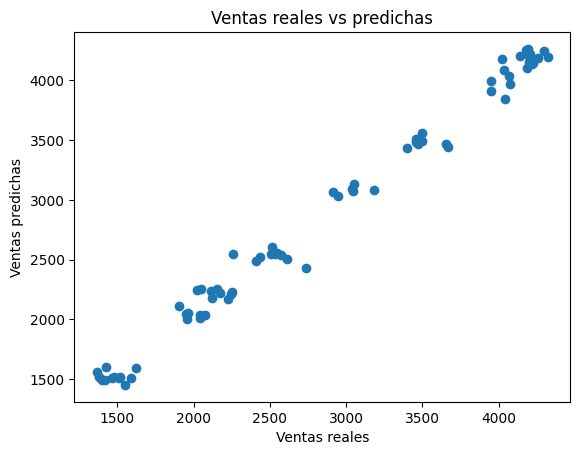

In [38]:
y_predi=bosque.predict(X_prueba)
plt.scatter(y_prueba,y_predi)
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Ventas reales vs predichas")
plt.show()